In [13]:
import matplotlib.pyplot as plt
import os 
import sys 
import csv
import numpy as np
from datetime import datetime
import seaborn as sns

%matplotlib inline

In [ ]:
# Part 0 Generate Pie Chart for number of stocks per sector

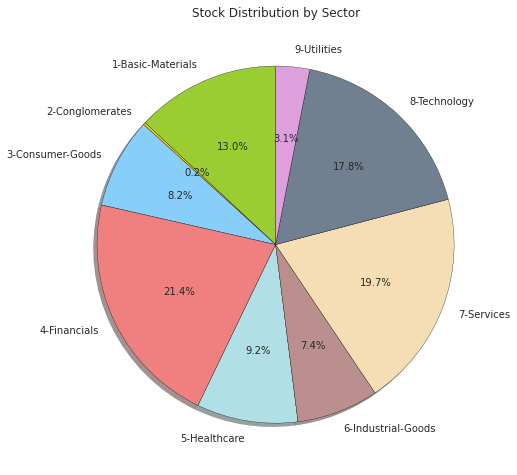

In [148]:
fig0 = PdfPages("../results/figures/Stock_distribution_By_Sector.pdf")
plt.figure(figsize=[8,8])
stock_name = ["1-Basic-Materials", "2-Conglomerates", "3-Consumer-Goods", 
             "4-Financials", "5-Healthcare", "6-Industrial-Goods", "7-Services",
             "8-Technology", "9-Utilities"]
stock_colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'powderblue', 'rosybrown',
               'wheat', 'slategray', 'plum']
stock_count = [446, 7, 280, 732, 313, 253, 673, 610, 105]
plt.pie(stock_count, labels = stock_name, autopct='%1.1f%%', colors= stock_colors, shadow=True, startangle=90)
plt.title("Stock Distribution by Sector")
plt.savefig(fig0,format= "pdf")
fig0.close()

In [21]:
def parseDate2(date):
    if(date == None): return datetime.today()
    date_info = date.split("-")
    year, month, day = int(date_info[0].strip()), int(date_info[1].strip()), int(date_info[2].strip())
    return datetime(year, month, day)

In [4]:
def plot_metagene(file_name, title):   
    with open(file_name, 'r') as f:
        reader = csv.reader(f, delimiter = ",")
        d = list(reader)
    darr = np.array(d)
    dates = darr[0][1:]
    weighted = map(float,darr[1][1:])
    weighted_5pc = map(float, darr[3][1:])
    weighted_50pc = map(float, darr[4][1:])
    weighted_95pc = map(float, darr[5][1:])
    date_points = [parseDate2(d) for d in dates]
    plt.plot(date_points, weighted, color="red") 
    plt.fill_between(date_points, weighted_5pc, weighted_95pc, color="grey")
    plt.xlabel("Time")
    plt.ylabel("Stock Prices")
    plt.title(title)
    


In [5]:
# Part 1: Does weighting by market cap play a major influence on metastock trajectories? We 
# also performed bootstrapping to generate 90% confidence bands to get a better picture of
# how entire sectors behaved over time. 
# Red lines show the trajectory of overall metastocks, grey regions show how the overall industry
# could have potentially behaved overall. 

/share/PI/rondror/software/miniconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


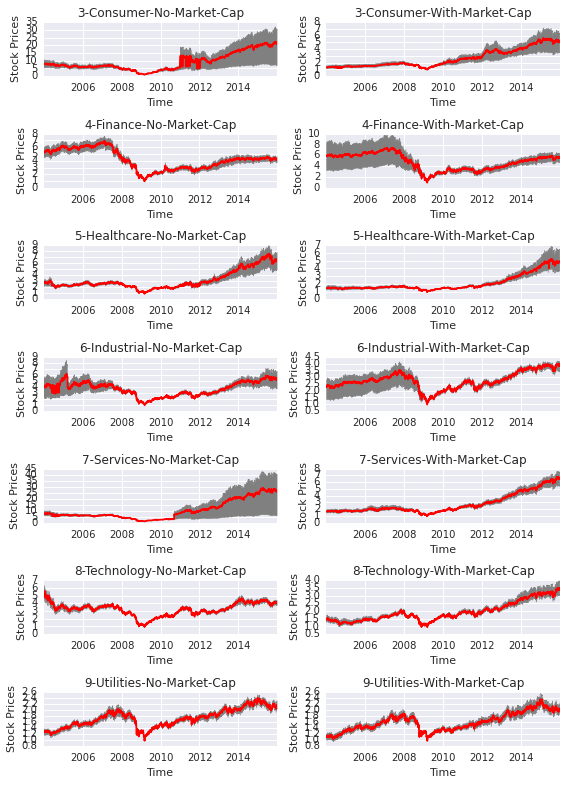

In [6]:
# Consumer Goods Analysis
from matplotlib.backends.backend_pdf import PdfPages
fig1 = PdfPages('../results/figures/Metagene_with_and_without_market_cap.pdf')
plt.figure(figsize=[8,11])

plt.subplot(7,2,1)
consumer_no_cap_file = "../data/metagene_output/no-market-cap/3-consumer-goods-no-cap-metagene.txt"
plot_metagene(consumer_no_cap_file, "3-Consumer-No-Market-Cap")

plt.subplot(7,2,2)
consumer_with_cap_file="../data/metagene_output/with-market-cap/3-consumer-goods-with-cap-metagene.csv"
plot_metagene(consumer_with_cap_file, "3-Consumer-With-Market-Cap")

# Financial Analysis
plt.subplot(7,2,3)
finance_no_cap_file="../data/metagene_output/no-market-cap/4-financials-no-cap-metagene.txt"
plot_metagene(finance_no_cap_file, "4-Finance-No-Market-Cap")

plt.subplot(7,2,4)
finance_with_cap_file="../data/metagene_output/with-market-cap/4-financials-with-cap-metagene.csv"
plot_metagene(finance_with_cap_file, "4-Finance-With-Market-Cap")

# Healthcare Analysis
plt.subplot(7,2,5)
healthcare_no_cap_file="../data/metagene_output/no-market-cap/5-healthcare-no-cap-metagene.txt"
plot_metagene(healthcare_no_cap_file, "5-Healthcare-No-Market-Cap")

plt.subplot(7,2,6)
healthcare_with_cap_file="../data/metagene_output/with-market-cap/5-healthcare-with-cap-metagene.csv"
plot_metagene(healthcare_with_cap_file, "5-Healthcare-With-Market-Cap")

# Industrial Analysis
plt.subplot(7,2,7)
industrial_no_cap_file="../data/metagene_output/no-market-cap/6-industrial-goods-no-cap-metagene.txt"
plot_metagene(industrial_no_cap_file, "6-Industrial-No-Market-Cap")

plt.subplot(7,2,8)
industrial_with_cap_file="../data/metagene_output/with-market-cap/6-industrial-goods-with-cap--metagene.csv"
plot_metagene(industrial_with_cap_file, "6-Industrial-With-Market-Cap")


# Services Analysis
plt.subplot(7,2,9)
services_no_cap_file="../data/metagene_output/no-market-cap/7-services-no-cap-metagene.txt"
plot_metagene(services_no_cap_file, "7-Services-No-Market-Cap")

plt.subplot(7,2,10)
services_with_cap_file="../data/metagene_output/with-market-cap/7-services-with-cap-metagene.txt"
plot_metagene(services_with_cap_file, "7-Services-With-Market-Cap")

# Technology Analysis
plt.subplot(7,2,11)
technology_no_cap_files="../data/metagene_output/no-market-cap/8-technology-no-cap-metagene.txt"
plot_metagene(technology_no_cap_files, "8-Technology-No-Market-Cap")

plt.subplot(7,2,12)
technology_with_cap_files="../data/metagene_output/with-market-cap/8-technology-with-cap-metagene.csv"
plot_metagene(technology_with_cap_files, "8-Technology-With-Market-Cap")

# Utilities Analysis
plt.subplot(7,2,13)
utilities_no_cap_files=("../data/metagene_output/no-market-cap/9-utilities-no-cap-metagene.txt")
plot_metagene(utilities_no_cap_files, "9-Utilities-No-Market-Cap")

plt.subplot(7,2,14)
utilities_with_cap_files="../data/metagene_output/with-market-cap/9-utilities-with-cap-metagene.csv"
plot_metagene(utilities_with_cap_files, "9-Utilities-With-Market-Cap")

plt.tight_layout()
plt.savefig(fig1, format="pdf")
fig1.close()

In [7]:
# Part 1 Analysis: Overall it seems like weighted by market cap does not play a significant role
# in determining the trajectory of the metastock as the red lines are rather similar in the
# left and right columns for all industry sectors. However, there is noticable differences in
# the confidence bands between metastocks of various sectors namely: 3-consumer-goods, 4-finance,
# and 7-services. Stocks in the healthcare, industrial, technology, and utilities sector are 
# rather stable, have very narrow confidence bands and don't vary much with or without incorporating
# market cap informatiom. From a descriptive stand point, we can assert that consumer goods, finance,
# and service stocks have higher variance in industry. 

# Given that metastock trajectories are rather similar regardless of whether market cap data was 
# included, we will proceed with our analysis with non-market weighted data because more stocks
# can be incorporated in analysis. 

# Stocks of similar profile 
# Consumer, Healthcare, and Services have a very similar profile where stocks before the 2009
# financial crisis are rather plateaued in stock price, experience only a very minor dip, but
# actually make significant growths starting in 2010 onwards. 

# Finance, Technology, and Industry stocks are similar in that they experience a rather significant
# dip starting in 2007 until 2009 but very gradually rebound to their original stock price. 
# The slope of dip was highest in the order of finance, tech, and then industry. In terms of 
# recovery, technology and industrial sectors have almost returned back to pre-2009 crash
# equilibrium. However, finance sectors are still under 2007 stock values. 

# Utilities has a unique profile where it experiences a climb before the drop at 2009, and a 
# similar rate climb for recovery. The periodic trend shows that this sector is rather stable 
# even amidst economic turbulence. 

# Our metastocks show a holistic profile of industry health stratified by sector. From the perspective
# of stock buyers, this information gives insight to the volatility of various stock sectors. 

In [8]:
# Part 2: Window analysis on before, during, and after financial crisis behavior comparison
# Between different stock sectors 

# It is evident just by looking at the healthcare vs finance sector that they had very different
# performances in cases of stock market crisis. In this section, we will apply the Mann-Whitney-U
# test to quantitatively show the significance in difference of these metastock behaviors before,
# during, and after the financial crisis. 

In [66]:
import os
import sys 
import csv 
import numpy as np 
import math
import scipy

In [168]:
# whitneyHoustonTest
# Get list of all column indices that fall within the start and end date
def inRangeTimeIndices(time_labels, START_DATE, END_DATE):
    in_range_time_indices = []
    beg, end = parseDate2(START_DATE), parseDate2(END_DATE)
    for index, date in enumerate(time_labels):
        if(index == 0): continue 
        curr_date = parseDate2(date)
        if(curr_date >= beg and curr_date <= end):
            in_range_time_indices.append(index)
    return in_range_time_indices


def calcMedian(stock_row, in_range_time_indices):
    freq_vals = [float(stock_row[i]) for i in in_range_time_indices]
    return np.median(freq_vals)

# Generate list of median values for each stock upon the frequencies that fall within
# the date range. Output [stock1_median, stock2_median, ... stockn_median]
def medianStatistic(START_DATE, END_DATE, STOCK_TABLE):
    median_statistic = []
    with open(STOCK_TABLE) as f: 
        reader = csv.reader(f, delimiter='\t')
        d = list(reader)
    darr = np.array(d)
    time_labels = darr[0,:]
    in_range_time_indices = inRangeTimeIndices(time_labels, START_DATE, END_DATE)
    stock_rows = darr[1:]
    for stock_row in stock_rows:
        median_statistic.append(round(calcMedian(stock_row, in_range_time_indices),4))
    return median_statistic

def createSameLenSample(stat1, stat2):
#     slen1, slen2 = len(stat1), len(stat2)
#     if(slen1 >= slen2): 
#         a = stat2
#         b = np.random.choice(stat1, slen2, replace=False)
#     else:
#         a = stat1
#         b = np.random.choice(stat2, slen1, replace=False)
    a = np.random.choice(stat1, 400, replace=True)
    b = np.random.choice(stat2, 400, replace=True)
    return a,b

def averageWhitney(median_statistic_1, median_statistic_2, k):
    avg_stat, avg_pval = 0,0
    for i in range(k):
        median_statistic_1, median_statistic_2 = createSameLenSample(median_statistic_1, median_statistic_2)
        statistic, pvalue = scipy.stats.mannwhitneyu(median_statistic_1, median_statistic_2)
        avg_stat += statistic
        avg_pval += pvalue
    return float(avg_stat)/k, float(avg_pval)/k

# Whitney U Test Driver
def whitneyUTestDriver(START_DATE, END_DATE, STOCK_TABLE1, STOCK_TABLE2):
    median_statistic_1 = medianStatistic(START_DATE, END_DATE, STOCK_TABLE1)
    median_statistic_2 = medianStatistic(START_DATE, END_DATE, STOCK_TABLE2)
    statistic, pvalue = averageWhitney(median_statistic_1, median_statistic_2, 1)
    return statistic, pvalue

In [169]:
# Comparison of Stock similarity at different time periods
def compareSectorPerformance(TABLE1, TABLE2, sectorName1, sectorName2, period):
    abs_beg_date = "2004-01-02"
    abs_end_date = "2015-12-31"
    
    precrash_sdate = "2006-01-03"
    precrash_edate = "2007-08-01"

    midcrash_sdate = "2007-08-04"
    midcrash_edate = "2009-06-01"

    postcrash_sdate = "2009-06-02"
    postcrash_edate = "2013-01-02"
    
    if(period == "before"):
        start, finish = precrash_sdate, precrash_edate
    elif(period == "during"):
        start, finish = midcrash_sdate, midcrash_edate
    elif(period == "after"):
        start, finish = postcrash_sdate, postcrash_edate
    elif(period == "total"):
        start, finish = abs_beg_date, abs_end_date
    stats, pval = whitneyUTestDriver(start, finish, TABLE1, TABLE2)
    
    print("Mann-Whitney U Test Statistic: " + sectorName1 + " vs " + sectorName2)
    print(start + " -- " + finish + " p-val:" + str(pval))

In [170]:
# Sector Comparison Method for Time Range
def sectorComparison(SECTOR_TABLES, SECTOR_NAMES, BEG, END):
    num_sectors = len(SECTOR_TABLES)
    pval_matrix = np.zeros((num_sectors, num_sectors))
    for i in range(num_sectors):
        for j in range(num_sectors):
            if(j > i):
                stats, pval = whitneyUTestDriver(BEG, END, SECTOR_TABLES[i], SECTOR_TABLES[j])
                pval_matrix[i][j] = (-1)*math.log(pval)
    return pval_matrix

In [171]:
SECTOR_TABLES = ["../data/stock_freq_summary_table/no-market-cap/3-consumer-no-cap-goods-metagene.txt",
                "../data/stock_freq_summary_table/no-market-cap/4-financials-no-cap-metagene.txt",
                "../data/stock_freq_summary_table/no-market-cap/5-healthcare-no-cap-metagene.txt",
                "../data/stock_freq_summary_table/no-market-cap/6-industrial-goods-no-cap-metagene.txt",
                "../data/stock_freq_summary_table/no-market-cap/7-services-no-cap-metagene.txt",
                "../data/stock_freq_summary_table/no-market-cap/8-technology-no-cap-metagene.txt",
                "../data/stock_freq_summary_table/no-market-cap/9-utilities-no-cap-metagene.txt"]
SECTOR_NAMES = ["Consumer-Goods", "Financials", "Healthcare", "Industrial-Goods", "Services", 
               "Technology", "Utilities"]


In [172]:
# Sector Comparison Before 2009 Financial Crisis 
before_crisis_comp = sectorComparison(SECTOR_TABLES, SECTOR_NAMES, "2006-01-03", "2007-08-01")

In [173]:
# Sector Comparison During 2009 Financial Crisis
during_crisis_comp = sectorComparison(SECTOR_TABLES, SECTOR_NAMES, "2007-08-04", "2009-06-01")

In [174]:
# Sector Comparison After 2009 Financial Crisis
after_crisis_comp = sectorComparison(SECTOR_TABLES, SECTOR_NAMES, "2009-06-02", "2013-01-02")

In [175]:
# Sector Comparison Overall 
tot_comp = sectorComparison(SECTOR_TABLES, SECTOR_NAMES,"2004-01-02", "2015-12-31")

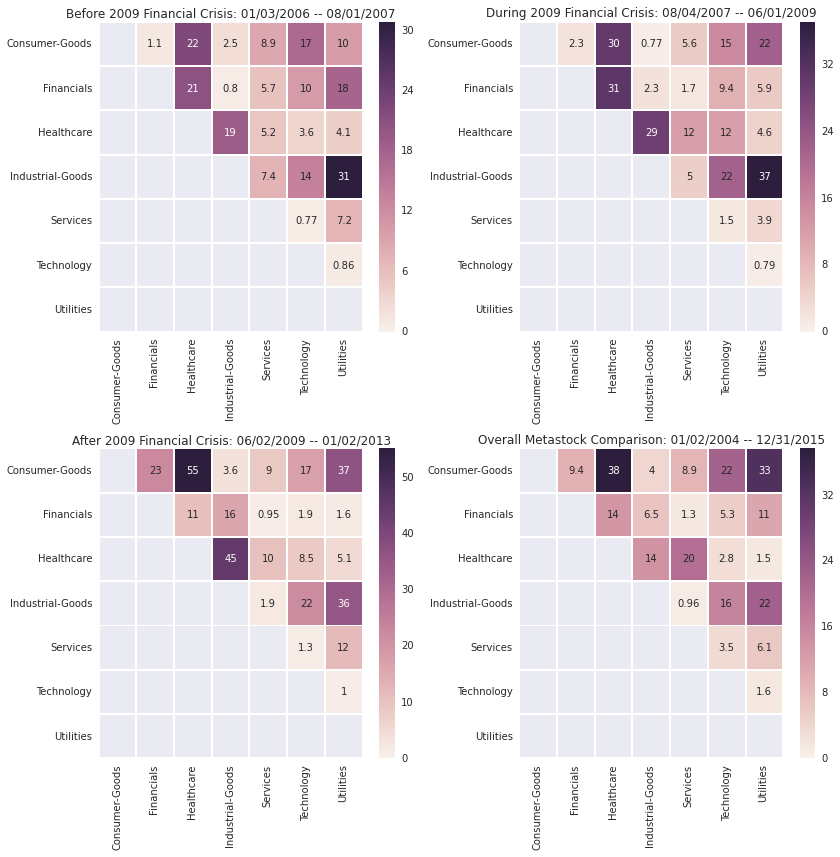

In [176]:
# Before 2009 Crisis Heatmap
fig2 = PdfPages('../results/figures/Sector_Comparison_Before_During_After_2009_Financial_Crisis_withRep_400.pdf')
plt.figure(figsize=[12,12])
plt.subplot(2,2,1)
mask = np.zeros_like(before_crisis_comp)
mask[np.tril_indices_from(mask)] = True
ax = sns.heatmap(before_crisis_comp, mask=mask, annot=True, linewidths=0.5, 
                 xticklabels=SECTOR_NAMES, yticklabels=SECTOR_NAMES)
ax.set_title("Before 2009 Financial Crisis: 01/03/2006 -- 08/01/2007")

# During 2009 Crisis Heatmap 
plt.subplot(2,2,2)
mask = np.zeros_like(during_crisis_comp)
mask[np.tril_indices_from(mask)] = True
ax = sns.heatmap(during_crisis_comp, mask=mask, annot=True, linewidths=0.5, 
                 xticklabels=SECTOR_NAMES, yticklabels=SECTOR_NAMES)
ax.set_title("During 2009 Financial Crisis: 08/04/2007 -- 06/01/2009")

# After 2009 Crisis Heatmap 
plt.subplot(2,2,3)
mask = np.zeros_like(after_crisis_comp)
mask[np.tril_indices_from(mask)] = True
ax = sns.heatmap(after_crisis_comp, mask=mask, annot=True, linewidths= 0.5, 
                 xticklabels=SECTOR_NAMES, yticklabels=SECTOR_NAMES)
ax.set_title("After 2009 Financial Crisis: 06/02/2009 -- 01/02/2013")


# Total Stock Sector Comparison
plt.subplot(2,2,4)
mask = np.zeros_like(tot_comp)
mask[np.tril_indices_from(mask)] = True
ax = sns.heatmap(tot_comp, mask=mask, annot=True, linewidths=0.5, 
                 xticklabels=SECTOR_NAMES, yticklabels=SECTOR_NAMES)
ax.set_title("Overall Metastock Comparison: 01/02/2004 -- 12/31/2015")

plt.tight_layout()
plt.savefig(fig2, format="pdf")
fig2.close()

In [ ]:
# Part 3: Portfolio Comparisons
# Research and find what where the most commonly bought combinations of stock portfolio. 
# Create the metagene for it and compare portfolio behavior. Some of portfolio metastocks
# might have had high upward trajectory but such wide confidence bands that they were really
# risky in reality. 